# Week 6 - Homework

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [3]:
df = pd.read_csv('data/jamb_exam_results.csv')
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
del df['student_id']

In [6]:
df = df.fillna(0)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state = 1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values


del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [9]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

## Question 1

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [12]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [13]:
print(export_text(dt, feature_names=dv.feature_names_))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



## Question 2

In [15]:
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [16]:
rf = RandomForestRegressor(n_estimators=10, n_jobs = -1, random_state = 1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [17]:
y_pred = rf.predict(X_val)
root_mean_squared_error(y_val, y_pred)

42.13724207871227

## Question 3

In [19]:
scores = []

for n in range(10, 200, 10):
    rf = RandomForestRegressor(n_estimators=n, n_jobs = -1, random_state = 1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    scores.append((n, rmse))

df_scores = pd.DataFrame(scores, columns = ['n_estimators', 'rmse'])

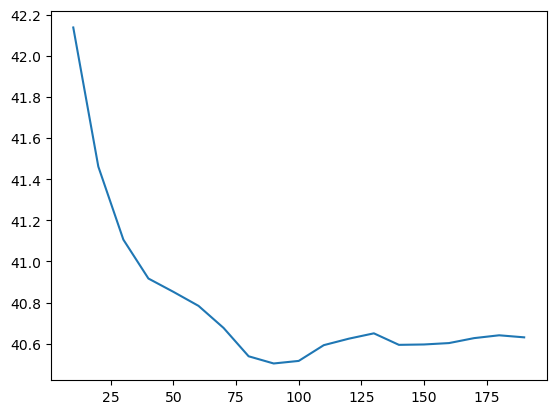

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.plot(df_scores.n_estimators, df_scores.rmse)
plt.show()

## Question 4

In [43]:
df_scores['rmse'].mean()

40.792647197652514

In [45]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 200, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                   max_depth=d,
                                   n_jobs = -1, 
                                   random_state = 1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        scores.append((d, n, rmse))

df_scores = pd.DataFrame(scores, columns = ['max_depth', 'n_estimators', 'rmse'])

In [65]:
df_scores.groupby(['max_depth']).mean()

,n_estimators,rmse
max_depth,,
10,100.0,40.396050
15,100.0,40.745369
20,100.0,40.749841
25,100.0,40.797831


## Question 5

In [68]:
rf = RandomForestRegressor(
    n_estimators=10,
    max_depth=20,
    random_state=1,
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [80]:
d1 = list(zip(dv.get_feature_names_out(),rf.feature_importances_))

In [84]:
df_importances = pd.DataFrame(d1)

In [96]:
df_importances.sort_values(1, ascending=False)

,0,1
27,study_hours_per_week,0.248354
4,attendance_rate,0.149729
5,distance_to_school,0.136486
28,teacher_quality,0.082682
2,age,0.069311
3,assignments_completed,0.031517
24,socioeconomic_status=High,0.025714
17,parent_involvement=High,0.022919
10,it_knowledge=High,0.017719
15,parent_education_level=Secondary,0.016957


## Question 6

In [99]:
import xgboost as xgb
features = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [115]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
scores = {}

In [117]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        
        results.append((it, train, val))

    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [125]:
%%capture output_03
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100, verbose_eval=5, 
                  evals=watchlist)

In [127]:
key = f'eta={xgb_params['eta']}'

scores[key] = parse_xgb_output(output_03)
key

'eta=0.1'

In [131]:
scores.keys()

dict_keys(['eta=0.3', 'eta=0.1'])

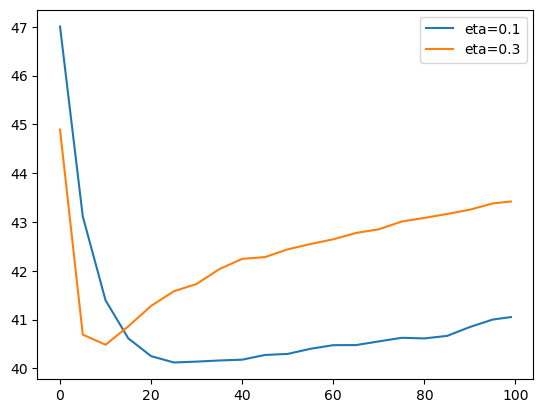

In [135]:
etas = ['eta=0.1', 'eta=0.3']


for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()